In [1]:
%matplotlib inline

from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
from WeinerGeneratorNumba import getWeiner, getWeinerSubset
from scipy.stats import norm
import math
from tqdm.notebook import trange, tqdm

def plotWeinerSteps(steps, tend, maxsteps):
    ts, ws, dws, dt = getWeiner(steps, tend, 0)

    #fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)

    plt.plot(ts, ws, color=((maxsteps-steps)/maxsteps, 0, steps/maxsteps))
    #fig2.scatter(ts, dws)

def plotRealizationDistribution(steps, realizations):
    fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)
    endpoints = []
    for realization in range(realizations):
        ts, ws, dws, dt = getWeiner(steps, 10, realization)
        fig1.plot(ts, ws)
        endpoints.append(ws[-1])

    mu, std = norm.fit(endpoints)
    sigma = math.sqrt(std)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    y = norm.pdf(x, mu, sigma)
    fig2.plot(x, y)

    return x,y

def getRealizationDistribution(steps, realizations):
    endpoints = []
    for realization in range(realizations):
        ts, ws, dws, dt = getWeiner(steps, 10, realization)
        endpoints.append(ws[-1])

    mu, std = norm.fit(endpoints)
    sigma = math.sqrt(std)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    y = norm.pdf(x, mu, sigma)

    return x,y

  0%|          | 0/1000 [00:00<?, ?it/s]

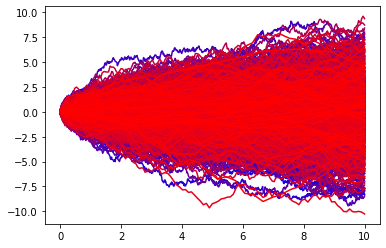

In [2]:
maxsteps = 1000
for steps in tqdm(range(maxsteps)):
   plotWeinerSteps(maxsteps-steps, 10, maxsteps)

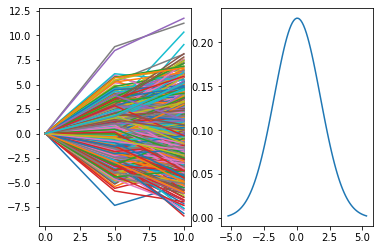

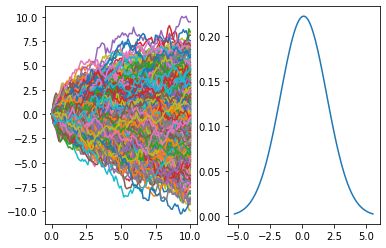

In [3]:
x1,y1 = plotRealizationDistribution(2, 1000)
x2,y2 = plotRealizationDistribution(100, 1000)

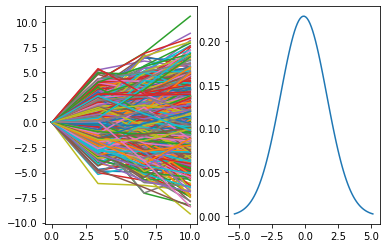

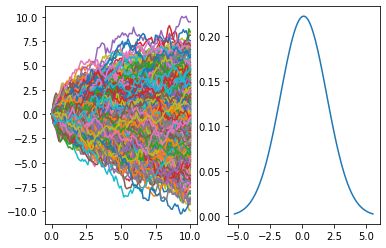

In [4]:
x1,y1 = plotRealizationDistribution(3, 1000)
x2,y2 = plotRealizationDistribution(100, 1000)

In [9]:
maxsteps = 50

fig3 = plt.figure()

for steps in tqdm(np.arange(2,maxsteps)):
    x,y = getRealizationDistribution(steps, 5000)
    plt.plot(x, y, color=((maxsteps-steps)/maxsteps, 0, steps/maxsteps), label = steps)

  0%|          | 0/48 [00:00<?, ?it/s]

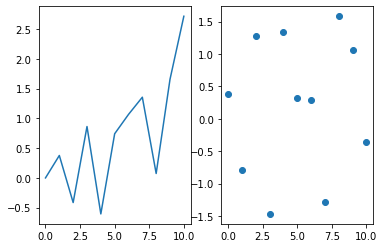

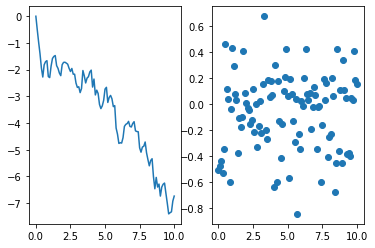

In [5]:
def plotWeiner(steps, tend, realization):
    ts, ws, dws, dt = getWeiner(steps, tend, realization)

    fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)

    fig1.plot(ts, ws)
    fig2.scatter(ts, dws)

plotWeiner(10, 10, 1)
plotWeiner(100, 10, 1)

AssertionError: 

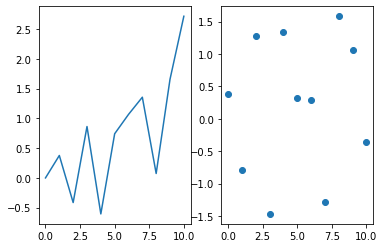

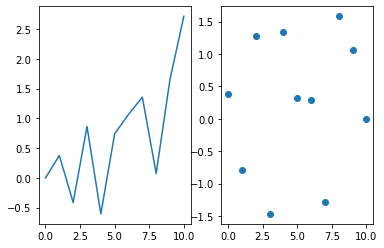

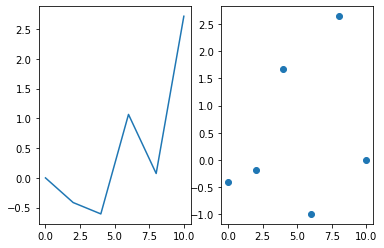

In [6]:
def plotWeinerSubset(nth, steps, tend, realization):
    ts, ws, dws, dt = getWeinerSubset(nth, steps, tend, realization)

    fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)

    fig1.plot(ts, ws)
    fig2.scatter(ts, dws)

plotWeiner(10, 10, 1)
plotWeinerSubset(1, 10, 10, 1)
plotWeinerSubset(2, 10, 10, 1)
plotWeinerSubset(3, 10, 10, 1)

1
1.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
2
2.0
[ 0.  2.  4.  6.  8. 10.]
5
5.0
[ 0.  5. 10.]


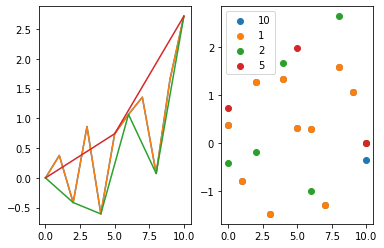

In [7]:
def plotWeiner1(steps, tend, realization):
    ts, ws, dws, dt = getWeiner(steps, tend, realization)

    fig1.plot(ts, ws, label = steps)
    fig2.scatter(ts, dws, label = steps)

def plotWeinerSubset1(nth, steps, tend, realization):
    ts, ws, dws, dt = getWeinerSubset(nth, steps, tend, realization)

    fig1.plot(ts, ws, label = nth)
    fig2.scatter(ts, dws, label = nth)
    print(nth)
    print(dt)
    print(ts)

fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)
plotWeiner1(10, 10, 1)
plotWeinerSubset1(1, 10, 10, 1)
plotWeinerSubset1(2, 10, 10, 1)
#plotWeinerSubset1(3, 10, 10, 1)
#plotWeinerSubset1(4, 10, 10, 1)
plotWeinerSubset1(5, 10, 10, 1)

plt.legend()

Checking if subset also needs a storage system but apparently it's about as fast to generate it as reading from file

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


reading from file time 1.2110345363616943
generating from previous 0.029967546463012695
generating from previous 0.029028654098510742


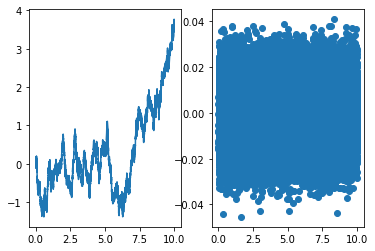

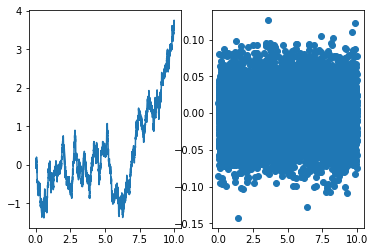

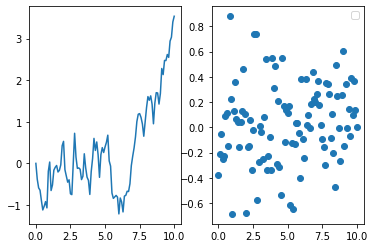

In [8]:
import time

lastTime = time.time()
plotWeiner(100000, 10, 1)
newTime = time.time()
print(f"reading from file time {newTime - lastTime}")
lastTime = newTime

plotWeinerSubset(10, 100000, 10, 1)
newTime = time.time()
print(f"generating from previous {newTime - lastTime}")
lastTime = newTime

plotWeinerSubset(1000, 100000, 10, 1)
newTime = time.time()
print(f"generating from previous {newTime - lastTime}")
lastTime = newTime

plt.legend()